# Simple Momentum Strategy

1. Download daily price data for QQQ, TLT, GLD, RWO from yahoo finance since 2016-01-01. Using the adjusted close price data, compute daily returns. This should be a DataFrame with index=date, columns=ticker and values=daily returns.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Get the data for the stock
univ = ['QQQ', 'TLT', 'GLD', 'RWO']
data = yf.download(univ,interval = '1d', start = '2016-01-01')


[*********************100%***********************]  4 of 4 completed


In [2]:
ret = data['Adj Close'].pct_change()[1:]
ret

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-05 00:00:00+00:00,0.002819,-0.001735,0.012116,-0.004034
2016-01-06 00:00:00+00:00,0.014441,-0.009606,-0.007696,0.013475
2016-01-07 00:00:00+00:00,0.014140,-0.031314,-0.017880,0.001795
2016-01-08 00:00:00+00:00,-0.004428,-0.008200,-0.015135,0.004478
2016-01-11 00:00:00+00:00,-0.008895,0.003077,0.003118,-0.010944
...,...,...,...,...
2024-12-16 00:00:00+00:00,0.002415,0.014401,-0.005128,0.002995
2024-12-17 00:00:00+00:00,-0.003839,-0.004404,-0.003138,0.002433
2024-12-18 00:00:00+00:00,-0.019185,-0.036077,-0.035297,-0.012504


2. Compute the signal. Complete the compute_momentum function which computes a simple momentum signal. The function takes in a DataFrame with index = date, columns=ticker and values containing daily returns. It returns a new DataFrame with index = date, columns=ticker and values containing the momentum signal for the ticker on that day. The momentum signal for each ticker is defined as the annualized sharpe ratio of the past 252 days.

In [39]:
def compute_momentum(ret):
    # fill out the body here
    # return a DataFrame "momentum" containing a simple momentum indicator
    momentum = ret.rolling(window=252).mean()/ret.rolling(window=252).std()*np.sqrt(252)
    return momentum
momentum = compute_momentum(ret)
momentum

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-11 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-12-16 00:00:00+00:00,1.823554,1.773730,0.366209,-0.314704
2024-12-17 00:00:00+00:00,1.862729,1.720451,0.451367,-0.305343
2024-12-18 00:00:00+00:00,1.687988,1.446754,0.218077,-0.336551


3. Create a portfolio. Complete the function compute_portfolio. This function takes as input the DataFrame "momentum" from above. It returns a new DataFrame "portfolio" which has the same index/columns and has as values portfolio weights. The weights are computed as follows. On each date, equal-weight long the tickers with a momentum signal above 1.

In [23]:
def compute_portfolio(momentum):
    # fill out the body here
    # return a DataFrame "portfolio" containing portfolio weights
    portfolio = momentum.map(lambda x: 1 if x > 1 else 0).apply(lambda x: x/sum(x), axis=1)
    return portfolio
portfolio = compute_portfolio(momentum)
portfolio

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2017-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2017-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2017-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN
2017-01-06 00:00:00+00:00,0.0,1.0,0.0,0.0
2017-01-09 00:00:00+00:00,0.0,1.0,0.0,0.0
...,...,...,...,...
2024-12-16 00:00:00+00:00,0.5,0.5,0.0,0.0
2024-12-17 00:00:00+00:00,0.5,0.5,0.0,0.0
2024-12-18 00:00:00+00:00,0.5,0.5,0.0,0.0


4. Portfolio returns. Using the "portfolio" returned in part(3) and the returns generated in part(1), compute the returns to the simple momentum strategy. 
- What is the annualized sharpe ratio of the strategy? 
- How about the annualized sharpe ratio within each year? 
- How correlated is the strategy with the underlying tickers?
- Plot the cumulative sum of the returns through time

The solution is such that days where there is no buy/sell, returns are 0.

In [44]:
new_port = (portfolio.shift(1)*ret).assign(total_ret=lambda x: x.sum(axis=1))[momentum.dropna().index[0]:].fillna(0)
new_port['total_ret'].mean()/new_port['total_ret'].std()*np.sqrt(252)

1.0799865333292165

In [45]:
yearly_sharpe = new_port['total_ret'].groupby(new_port.index.year).mean()/new_port['total_ret'].groupby(new_port.index.year).std()*np.sqrt(252)
yearly_sharpe

Date
2017    2.670445
2018   -0.024998
2019    1.015503
2020    1.528308
2021    1.411043
2022   -0.737295
2023    1.171866
2024    1.884803
Name: total_ret, dtype: float64

In [52]:
ret.corrwith(new_port['total_ret'])

Ticker
GLD    0.342796
QQQ    0.463667
RWO    0.253710
TLT    0.205496
dtype: float64

<Axes: xlabel='Date'>

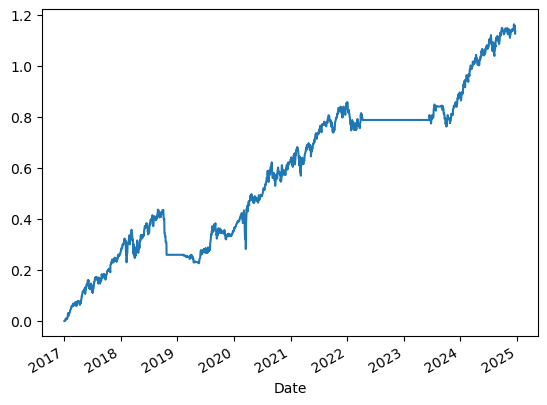

In [50]:
new_port['total_ret'].cumsum().plot()